# Creating a Filter, Edge Detection

### Import resources and display image

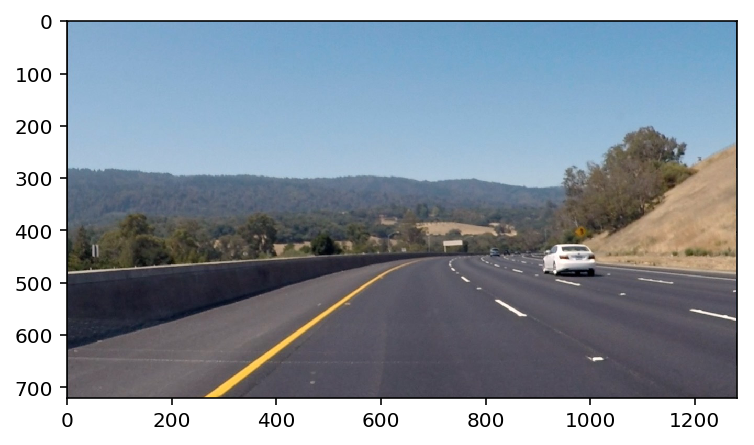

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

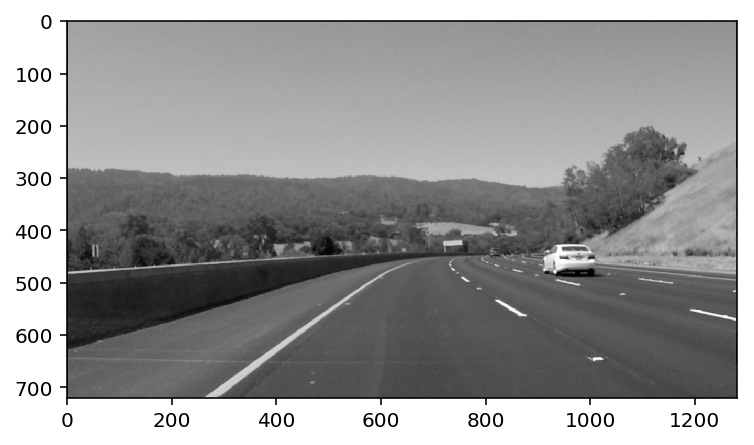

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

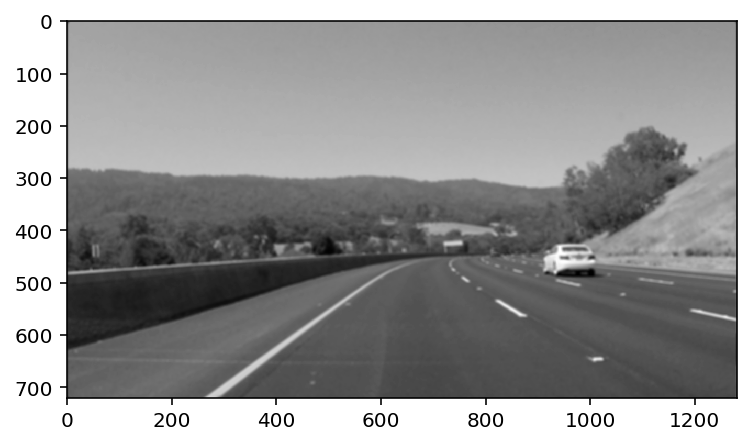

In [7]:
# Create a custom kernel
kernel = np.ones([6,6])/36

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, kernel)

plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



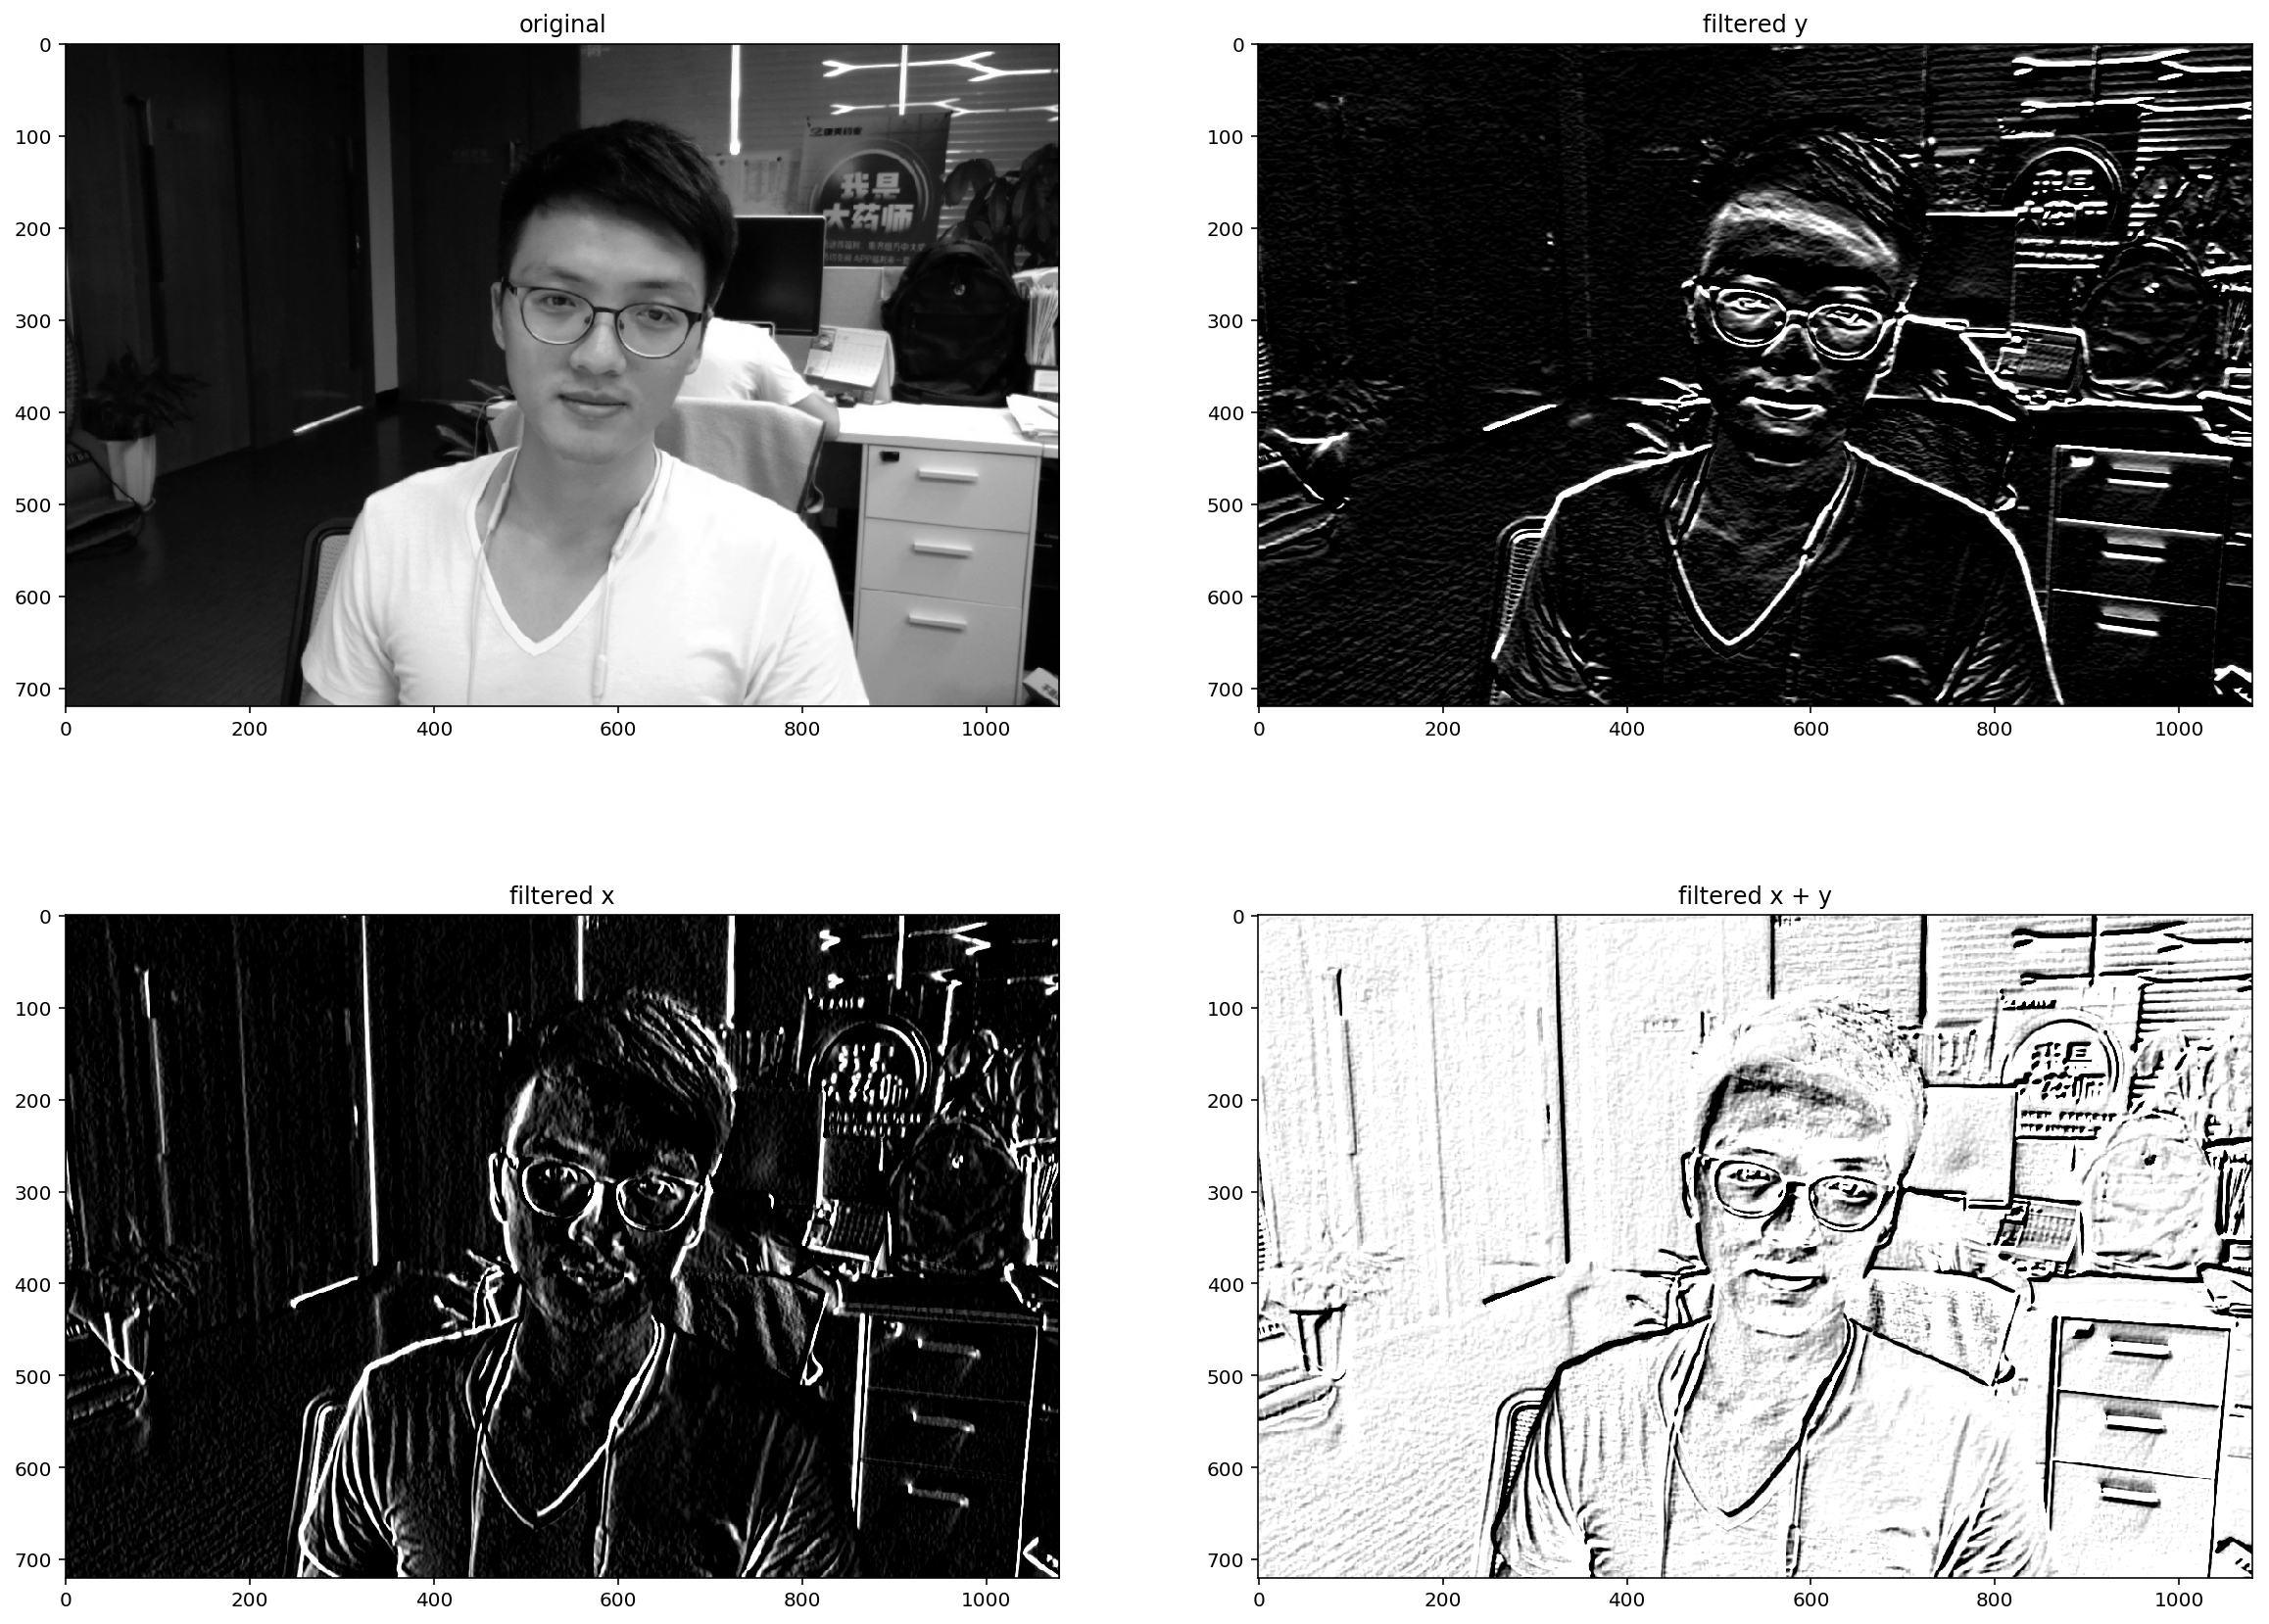

In [29]:
sobel_y = np.array([[-1,-1],
                   [1,1]])*3

sobel_y = np.array([[-1, -1, -1, -1, -1],
                    [-2, -2, -2, -2, -2],
                    [0, 0, 0, 0, 0],
                    [2, 2, 2, 2, 2],
                    [1, 1, 1, 1, 1]
                    ])

img = mpimg.imread('/Users/Young/Desktop/Photo on 7-29-18 at 3.06 PM.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
filter_img = cv2.filter2D(img, -1, sobel_y.T+sobel_y)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))


ax1.imshow(img, cmap='gray')
ax1.set_title('original')

ax2.imshow(cv2.filter2D(img, -1, sobel_y), cmap='gray')
ax2.set_title('filtered y')

ax3.imshow(cv2.filter2D(img, -1, sobel_y.T), cmap='gray')
ax3.set_title('filtered x')

ax4.imshow(255-cv2.filter2D(img, -1, sobel_y.T+sobel_y), cmap='gray')
ax4.set_title('filtered x + y')

plt.show()